# In this assignment you need:
Download income2.csv from http://www-bcf.usc.edu/~gareth/ISL/Income2.csv




1.	Explore the data through various figures.
2.	Predict “y = Income” as a linear function of “x = Years of Education” using simple linear regression, and predict Income for a new individual with “x = 18”.
3.	Show the scatter plot of Income versus Years of Education, and add the fitted line over the scatter plot.   
4.	Predict “y = Income” as a linear function of “x1 = Years of Education” and “x2 = Seniority” for a new individual with (x1 = 18, x2 = 60)
5.	Discuss “Years of Education” is a stronger predictor of “Income”  or “Seniority”? Why?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the The data 
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 1\Income2.csv", index_col=0)
df.head()

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922


## 1.	Explore the data through various figures.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B7E4B9B70>,
      dtype=object)

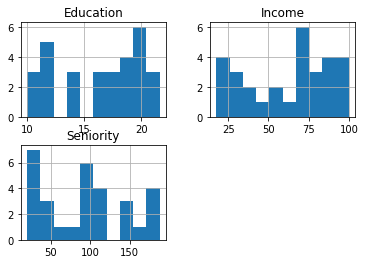

In [3]:
df.hist()

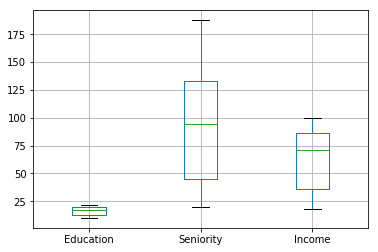

In [4]:
df.boxplot()

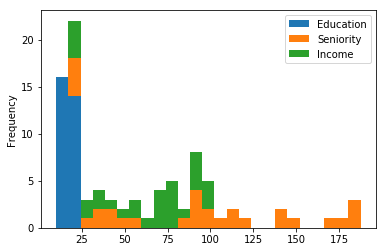

In [5]:
df.plot.hist(stacked=True, bins=25)

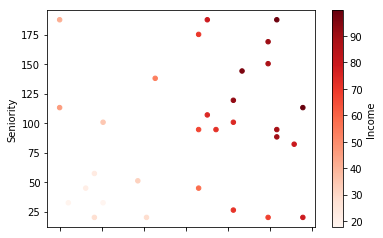

In [6]:
df.plot.scatter(x='Education', y='Seniority', c='Income', colormap='Reds')

## 2.	Predict “y = Income” as a linear function of “x = Years of Education” using simple linear regression, and predict Income for a new individual with “x = 18”.


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model.fit(X=df[['Education']], y=df['Income'])
prediction = model.predict(18)[0]
print("Annual income after 18 years of education: {:.2f} thousand dollars".format(prediction))

Annual income after 18 years of education: 73.05 thousand dollars



## 3.	Show the scatter plot of Income versus Years of Education, and add the fitted line over the scatter plot.   


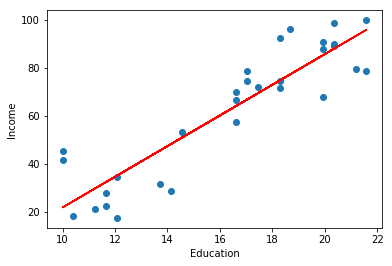

In [9]:
plt.scatter(df['Education'], df['Income'])
plt.xlabel('Education')
plt.ylabel('Income')
plt.plot(df['Education'], model.coef_*df['Education'] + model.intercept_, color='r')

## 4.	Predict “y = Income” as a linear function of “x1 = Years of Education” and “x2 = Seniority” for a new individual with (x1 = 18, x2 = 60)


In [10]:
model_2d = LinearRegression()
model_2d.fit(X=df[['Education', 'Seniority']], y=df['Income'])
prediction = model_2d.predict(np.array([18, 60]).reshape(1, -1))[0]
print("Annual income after 18 years of education and 60 units of seniority: {:.2f} thousand dollars".format(prediction))

Annual income after 18 years of education and 60 units of seniority: 66.41 thousand dollars


## 5.	Discuss “Years of Education” is a stronger predictor of “Income”  or “Seniority”? Why?


In [11]:
print("Model sensitivity to education: {:.4f}, and seniority: {:.4f}"
      .format((model_2d.coef_[0]/df['Education'].max()), model_2d.coef_[1]/df['Seniority'].max()))

Model sensitivity to education: 0.2731, and seniority: 0.0009


As seen in the previous cell, the model sensitivity, or linear coefficient, with respect to the number of years of education is higher than seniority. This is an indicator that years of education is a stronger predictor of income than seniority. I normalized each coefficient by the maximum of the respective series in order to compare the two coefficients more fairly and accurately.


It can also be seen in the following graph that as the number of years of education increases (x-axis) the income level (red coloring) increases. This is not as noticable for seniority (y-axis) 

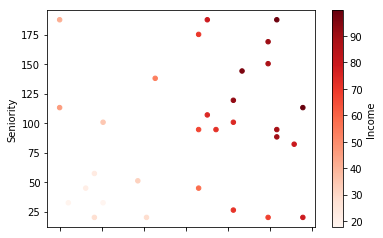

In [12]:
df.plot.scatter(x='Education', y='Seniority', c='Income', colormap='Reds')